# Loan Status Prediction using Machine Learning with Python

##### using SVM to classifiy (Accept or reject) loan

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , f1_score , precision_score , recall_score , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
# load data
data = pd.read_csv('loan_dataset.csv')
data.shape

(614, 13)

In [3]:
# show first five row in dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# statistical for data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [7]:
data.dropna(inplace=True , axis=0)

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
data.shape

(480, 13)

In [10]:
print(data['Dependents'].unique())

['1' '0' '2' '3+']


In [11]:
# Convert all '3+' to 3
data.replace('3+', '3' , inplace = True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
print(data['Dependents'].unique())

['1' '0' '2' '3']


In [13]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


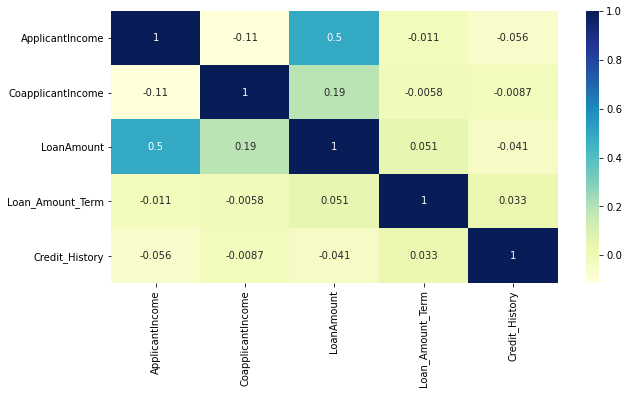

In [14]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr() , cmap='YlGnBu' , annot=True)
plt.show()

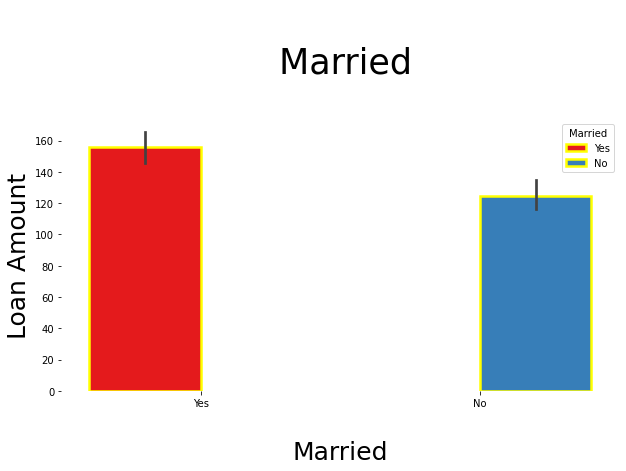

In [15]:
plt.subplots(figsize=(10,5))
p = sns.barplot(x=data["Married"],y=data["LoanAmount"],palette="Set1", saturation=2, edgecolor = "yellow", linewidth = 2.5,hue=data["Married"])
p.axes.set_title("\n Married\n", fontsize=35)
plt.ylabel("Loan Amount" , fontsize = 25)
plt.xlabel("\nMarried" , fontsize = 25)
# plt.yscale("log")
sns.despine(left=True, bottom=True)
plt.show()

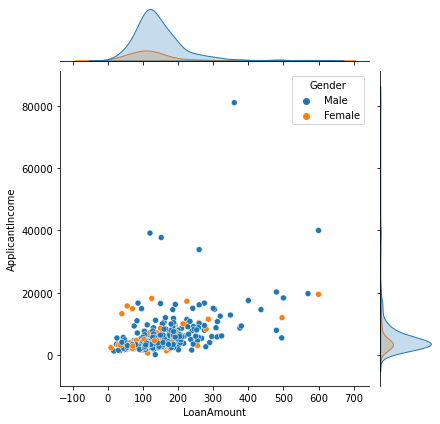

In [16]:
sns.jointplot(x='LoanAmount' , y = 'ApplicantIncome' , data=data , hue='Gender')
plt.show()

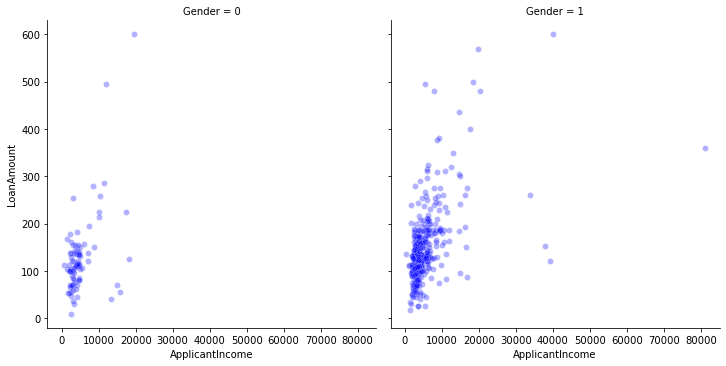

In [65]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=data, col="Gender",color="Blue",alpha=0.3)
plt.show()

<Figure size 1080x504 with 0 Axes>

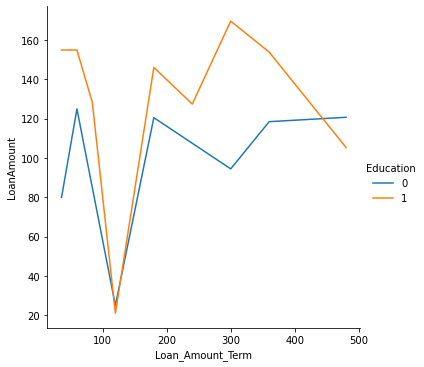

In [71]:
plt.figure(figsize=(15,7))
sns.relplot(x="Loan_Amount_Term", y="LoanAmount", data=data,kind="line",hue="Education" , ci=None)
plt.show()

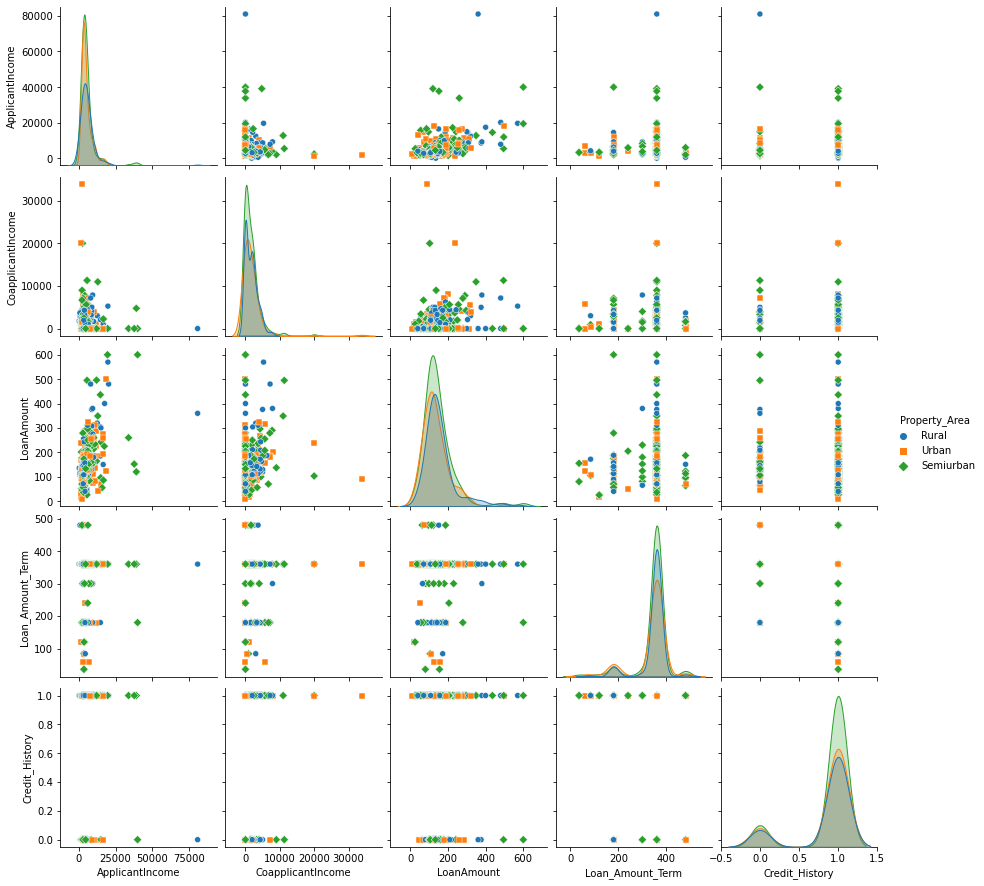

In [17]:
sns.pairplot(data , hue='Property_Area' , markers=["o", "s", "D"])
plt.show()

In [18]:
print(data['Gender'].unique())
print(data['Married'].unique())
print(data['Education'].unique())
print(data['Self_Employed'].unique())
print(data['Property_Area'].unique())
print(data['Loan_Status'].unique())

['Male' 'Female']
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


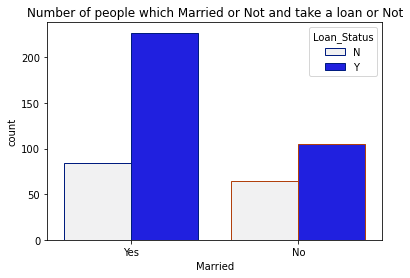

In [19]:
sns.countplot(x='Married' , data=data , hue = 'Loan_Status' , color='Blue', edgecolor=sns.color_palette("dark", 2))
plt.title("Number of people which Married or Not and take a loan or Not")
plt.show()

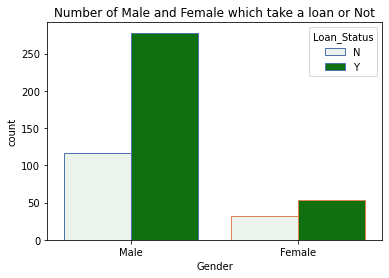

In [20]:
sns.countplot(x='Gender' , data=data , hue = 'Loan_Status' , color='green', edgecolor=sns.color_palette("deep", 2))
plt.title("Number of Male and Female which take a loan or Not")
plt.show()

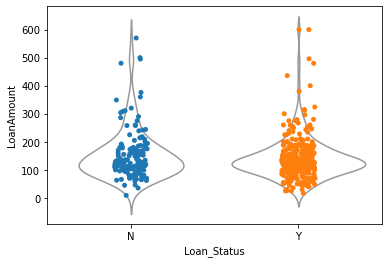

In [21]:
ax = sns.violinplot(x="Loan_Status", y="LoanAmount", data=data,inner=None, color="1")
ax = sns.stripplot(x="Loan_Status", y="LoanAmount", data=data)

<Figure size 1152x360 with 0 Axes>

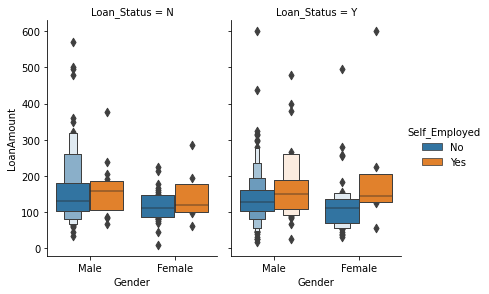

In [22]:
plt.figure(figsize=(16,5))
g = sns.catplot(x="Gender", y="LoanAmount", hue="Self_Employed", col="Loan_Status",data=data, kind="boxen", height=4, aspect=.7)
plt.show()

##### Convert Categorical data to Numerical data
###### --> Gender : Male (1)  Female (0)
###### --> Married : Yes (1)  No (0)
###### --> Education : Graduate (1)  Not Graduate (0)
###### --> Self_Employed : Yes (1)  No (0)

###### --> Property_Area :  Urban (2) Semiurban (1) Rural (0)
###### --> Loan_Status : Y (1)  N (0)


In [23]:
data.replace({'Gender':{'Male':1 , 'Female':0} , 'Married':{'Yes':1 , 'No':0} , 'Education':{'Graduate':1 , 'Not Graduate' : 0} , 
              'Self_Employed':{'Yes':1 , 'No':0} , 'Property_Area':{'Urban':2 , 'Semiurban':1 , 'Rural':0} , 'Loan_Status':{'Y':1 , 'N':0} } , inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


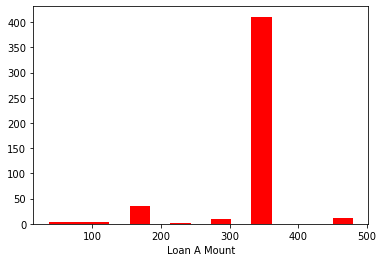

In [24]:
plt.hist(data['Loan_Amount_Term'] , bins=15 , color='r' )
plt.xlabel('Loan A Mount')
plt.show()

In [25]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
# split data
X = data.iloc[: ,1 :-1]
y = data.iloc[: , -1]
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42 , shuffle=True )
X_train.shape

(384, 11)

In [27]:
# fit X_train and y_train using SVC and linear kernel
model = SVC(kernel='linear' , random_state=1 )
model.fit(X_train , y_train)

# predict X_train after fit data to measure model cooffecient 
training_prediction = model.predict(X_train)

print("Score training_prediction : " , model.score(X_train , y_train) )
print("Accuracy Score training_prediction : " ,  accuracy_score(y_train , training_prediction) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
# ------------------------------------------------
# predict X_test  

testing_prediction = model.predict(X_test)
print("Score testing_prediction : " , model.score(X_test , y_test) )
print("Accuracy Score training_prediction : " ,  accuracy_score(y_test , testing_prediction) )
print("******************************************************************")
print("Confusion Matrix for testing prediction : \n" , confusion_matrix(y_test , testing_prediction))
print("Precesion Value : model that detects mights be true ,and that's really true :-->  " , precision_score(y_test , testing_prediction))
print("recall value : The model measures what is true for all data :----->  " , recall_score(y_test , testing_prediction))
print("F1 Score : to determine which (precision or recall ) is true :--> " , f1_score(y_test , testing_prediction))

Score training_prediction :  0.796875
Accuracy Score training_prediction :  0.796875
******************************************************************
******************************************************************
******************************************************************
Score testing_prediction :  0.8125
Accuracy Score training_prediction :  0.8125
******************************************************************
Confusion Matrix for testing prediction : 
 [[10 18]
 [ 0 68]]
Precesion Value : model that detects mights be true ,and that's really true :-->   0.7906976744186046
recall value : The model measures what is true for all data :----->   1.0
F1 Score : to determine which (precision or recall ) is true :-->  0.8831168831168831


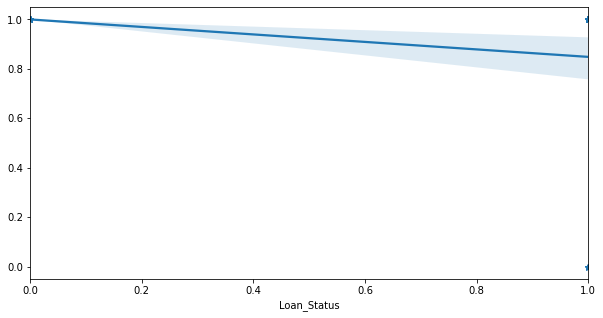

In [72]:
fig,ax=plt.subplots(figsize=(10,5))
sns.regplot(x=y_test,y=testing_prediction,marker="*")
plt.show()

In [28]:
df = pd.DataFrame(data={'Acutal ':y_test , 'predicted ':testing_prediction})
df.head(20)

,Acutal,predicted
92,1,1
529,1,1
505,1,1
358,0,0
512,1,1
220,0,0
347,1,1
482,1,1
97,1,1
566,1,1


### test SVC linear model

In [29]:
# test SVC linear model
sub1 = (1,1,2,1,0,11417,1126,225,360,1,2)
sub1 = np.asarray(sub1).reshape(1,-1)

sub2 = (0,0,0,1,0,10000,1666,225,360,1,0)
sub2 = np.asarray(sub2).reshape(1,-1)

pred_sub1 = model.predict(sub1)
pred_sub2 = model.predict(sub2)
print("SUB 1 : Acutal value for sub sample is (1) and predicted value : " , pred_sub1)
print("SUB 2 : Acutal value for sub sample is (0) and predicted value : " , pred_sub2)

SUB 1 : Acutal value for sub sample is (1) and predicted value :  [1]
SUB 2 : Acutal value for sub sample is (0) and predicted value :  [1]


In [42]:
# predict using Another Model naive_bayes
from sklearn.naive_bayes import GaussianNB

In [56]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42 , shuffle=True )
GNB = GaussianNB()
GNB.fit(X_train , y_train)

# predict X_train after fit data to measure model cooffecient 
training_prediction_GNB = GNB.predict(X_train)

print("Accuracy Score training_prediction GNB : " ,  accuracy_score(y_train , training_prediction_GNB) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
# ------------------------------------------------
# predict X_test  

testing_prediction_GNB = GNB.predict(X_test)
print("Accuracy Score testing_prediction GNB : " ,  accuracy_score(y_test , testing_prediction_GNB) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")

df_GNB = pd.DataFrame(data={'Acutal ':y_test , 'predicted ':testing_prediction_GNB})
df_GNB.head()

Accuracy Score training_prediction GNB :  0.7942708333333334
******************************************************************
******************************************************************
******************************************************************
Accuracy Score testing_prediction GNB :  0.8229166666666666
******************************************************************
******************************************************************
******************************************************************


,Acutal,predicted
92,1,1
529,1,1
505,1,1
358,0,0
512,1,1


In [51]:
# predict using Another Model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42 , shuffle=True , stratify=y)

DTC = DecisionTreeClassifier(random_state=1 , max_depth=5, criterion="entropy")
DTC.fit(X_train , y_train)

# predict X_train after fit data to measure model cooffecient 
training_prediction_DTC = DTC.predict(X_train)

print("Accuracy Score training_prediction DTC : " ,  accuracy_score(y_train , training_prediction_DTC) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
# ------------------------------------------------
# predict X_test  

testing_prediction_DTC = DTC.predict(X_test)
print("Accuracy Score testing_prediction DTC : " ,  accuracy_score(y_test , testing_prediction_DTC) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")

df_DTC = pd.DataFrame(data={'Acutal ':y_test , 'predicted ':testing_prediction_DTC})
df_DTC.head()

Accuracy Score training_prediction DTC :  0.8541666666666666
******************************************************************
******************************************************************
******************************************************************
Accuracy Score testing_prediction DTC :  0.7604166666666666
******************************************************************
******************************************************************
******************************************************************


,Acutal,predicted
244,1,1
580,1,1
603,1,1
58,1,1
538,0,1
